In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [13]:
ihm_mean_results = np.array([
    [87.22, 52.52, 48.23],
    [88.01, 54.51, 50.19],
    [88.15, 53.86, 53.85],
    [87.50, 54.57, 45.59],
    [87.01, 53.48, 50.37]
]) / 100
ihm_mean_df = pd.DataFrame({
    "# Prototypes": [4, 8, 16, 32, 64],
    "AUROC": ihm_mean_results[:, 0],
    "AUPR": ihm_mean_results[:, 1],
    # "F1": mean_results[:, 2]
})
ihm_mean_df

,# Prototypes,AUROC,AUPR
0,4,0.8722,0.5252
1,8,0.8801,0.5451
2,16,0.8815,0.5386
3,32,0.8750,0.5457
4,64,0.8701,0.5348


In [14]:
pheno_mean_results = np.array([
    [82.41, 54.30, 53.34],
    [83.11, 55.96, 53.82],
    [83.34, 56.39, 53.83],
    [82.41, 54.29, 53.33],
    [82.28, 54.17, 52.84],
]) / 100
pheno_mean_df = pd.DataFrame({
    "# Prototypes": [4, 8, 16, 32, 64],
    "AUROC": pheno_mean_results[:, 0],
    "AUPR": pheno_mean_results[:, 1],
    # "F1": mean_results[:, 2]
})
pheno_mean_df

,# Prototypes,AUROC,AUPR
0,4,0.8241,0.5430
1,8,0.8311,0.5596
2,16,0.8334,0.5639
3,32,0.8241,0.5429
4,64,0.8228,0.5417


In [15]:
# fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# axes[0, 0].bar(np.arange(len(mean_df)), mean_df["AUROC"])
# axes[0, 0].set_ylim(0.8, 0.9)
# axes[0, 0].set_title("AUROC vs. # Prototypes")

# axes[0, 1].bar(np.arange(len(mean_df)), mean_df["AUPR"])
# axes[0, 1].set_ylim(0.5, 0.6)
# axes[0, 1].set_title("AUPR vs. # Prototypes")

# axes[0, 2].bar(np.arange(len(mean_df)), mean_df["F1"])
# axes[0, 2].set_ylim(0.4, 0.6)
# axes[0, 2].set_title("F1 vs. # Prototypes")


In [16]:
w = 1
num_pathologies = len(ihm_mean_df)
num_methods = len(ihm_mean_df.columns) - 1

first_tick = int(math.ceil((num_methods*w/2))) - 2
gap = num_methods + 1
x = np.array([first_tick + i*gap for i in range(num_pathologies)])
print(x)

data_color = [0, 1]
data_color = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('RdYlGn')
# my_cmap = plt.cm.get_cmap('Spectral_r')
colors = my_cmap(data_color)

[-1  2  5  8 11]


/tmp/ipykernel_3034670/2238243477.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = plt.cm.get_cmap('RdYlGn')


In [17]:
ihm_mean_df.iloc[:, 1].values

array([0.8722, 0.8801, 0.8815, 0.875 , 0.8701])

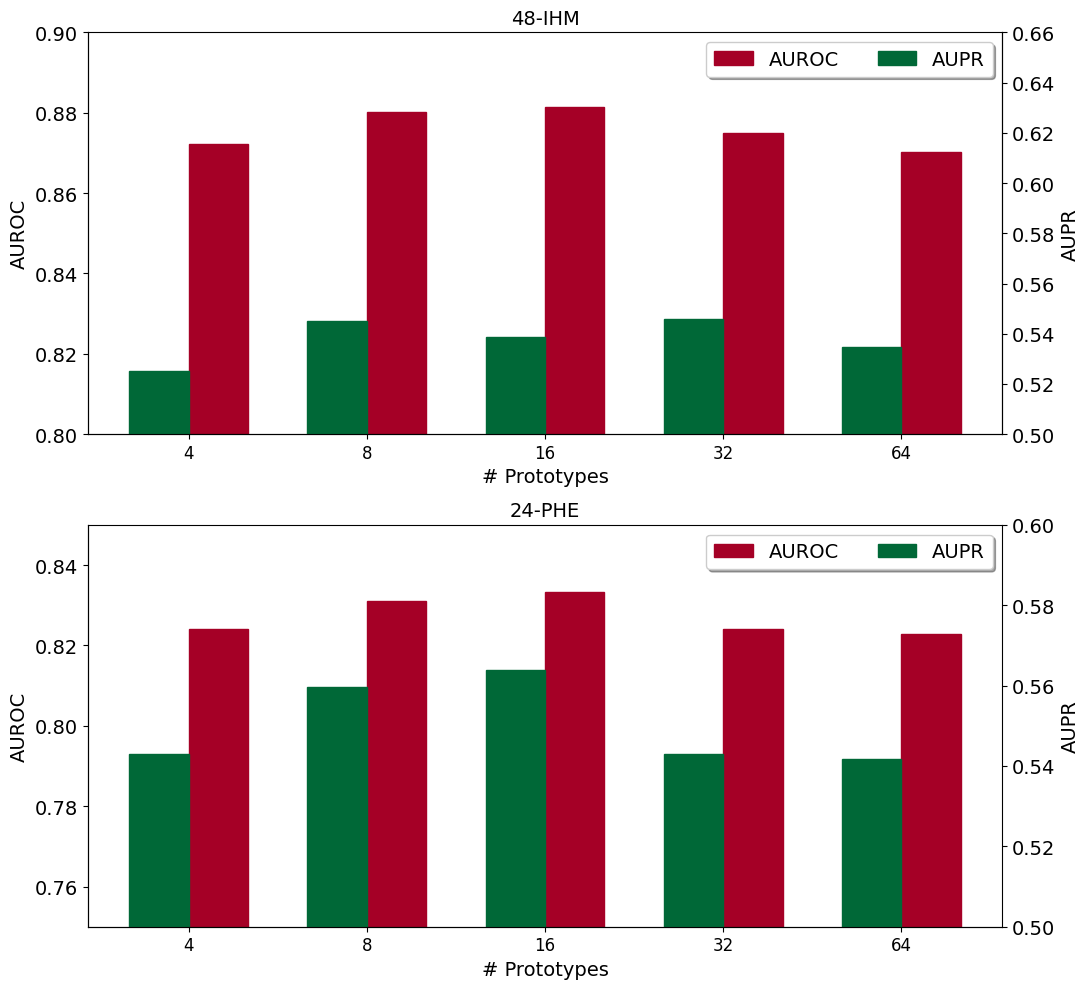

In [33]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10))
ax = axes[0]
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
b = []
b.append(ax.bar(x - (0 - num_methods/2 + 0.5), 
                        ihm_mean_df.iloc[:, 1].values, 
                        width=w, 
                        color=colors[0],
                        align='center', 
                        edgecolor=colors[0],
                        linewidth = 1.0, 
                        alpha=1))

b.append(ax2.bar(x - (1 - num_methods/2 + 0.5), 
                        ihm_mean_df.iloc[:, 2].values, 
                        width=w, 
                        color=colors[1],
                        align='center', 
                        edgecolor=colors[1],
                        linewidth = 1.0, 
                        alpha=1))
ax.set_xlabel('# Prototypes', fontsize=14)
ax.set_xticks(x)
# pathologies = [textwrap.fill(l, width=10, break_long_words=False) for l in ihm_mean_df["# Prototypes"].values]
# print(pathologies)
ax.set_xticklabels(ihm_mean_df["# Prototypes"].values, fontsize=12)
ax.set_ylabel('AUROC', fontsize=14)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.set_ylim(0.8, 0.9)
ax2.set_ylabel('AUPR', fontsize=14)
ax2.tick_params(axis='y', which='major', labelsize=14)
ax2.set_ylim(0.5, 0.66)
# ax.grid(linestyle='--')
ax.spines[['top']].set_visible(False)
ax.set_title("48-IHM", fontsize=14)

ax.legend([b_ for b_ in b],
            ["AUROC", "AUPR"],
            fontsize=14,
            # loc='lower center', bbox_to_anchor=(0.5, -0.2),
            ncol=2, fancybox=True, shadow=True)

ax = axes[1]
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
b = []
b.append(ax.bar(x - (0 - num_methods/2 + 0.5), 
                        pheno_mean_df.iloc[:, 1].values, 
                        width=w, 
                        color=colors[0],
                        align='center', 
                        edgecolor=colors[0],
                        linewidth = 1.0, 
                        alpha=1))

b.append(ax2.bar(x - (1 - num_methods/2 + 0.5), 
                        pheno_mean_df.iloc[:, 2].values, 
                        width=w, 
                        color=colors[1],
                        align='center', 
                        edgecolor=colors[1],
                        linewidth = 1.0, 
                        alpha=1))
ax.set_xlabel('# Prototypes', fontsize=14)
ax.set_xticks(x)
# pathologies = [textwrap.fill(l, width=10, break_long_words=False) for l in pheno_mean_df["# Prototypes"].values]
# print(pathologies)
ax.set_xticklabels(pheno_mean_df["# Prototypes"].values, fontsize=12)
ax.set_ylabel('AUROC', fontsize=14)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.set_ylim(0.75, 0.85)
ax2.set_ylabel('AUPR', fontsize=14)
ax2.tick_params(axis='y', which='major', labelsize=14)
ax2.set_ylim(0.5, 0.6)
# ax.grid(linestyle='--')
ax.spines[['right', 'top']].set_visible(False)
ax.set_title("24-PHE", fontsize=14)
ax.legend([b_ for b_ in b],
            ["AUROC", "AUPR"],
            fontsize=14,
            # loc='lower center', bbox_to_anchor=(0.5, -0.2),
            ncol=2, fancybox=True, shadow=True)

plt.tight_layout()
plt.savefig("hypermarameter.pdf", bbox_inches='tight', pad_inches=0.)

In [ ]:
import numpy as np

np.std([0.4189, 0.3580])

0.030450000000000005

In [1]:
53.85 - 51.95

1.8999999999999986

In [2]:
56.39 - 54.57

1.8200000000000003

In [3]:
88.15 - 86.19

1.960000000000008

In [6]:
83.34 - 82.49

0.8500000000000085